# **Chapter 2 Exercise 4**

In [10]:
import nsfg
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome ==1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [11]:
def CohenEffectS(group1,group2):
    diff  = group1.mean() - group2.mean()
    
    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()
    
    psd = ((n1*var1 + n2* var2)/(n1+n2))**(.5)
    coe = diff/psd
    return coe

In [12]:
first_weight = firsts.totalwgt_lb
other_weight = others.totalwgt_lb

CohenEffectS(first_weight,other_weight)

-0.088672927072602

**First babies are 1/10th of 1 standard deviation lighter than others, not much of a difference, but a larger one than pregnancy lengths**

# **Chapter 3 Exercise 1**

In [44]:
import nsfg
import thinkstats2
import thinkplot
resp = nsfg.ReadFemResp()

In [33]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


In [63]:
d = resp.numkdhh
pmf = thinkstats2.Pmf(d,label = 'actual')


def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

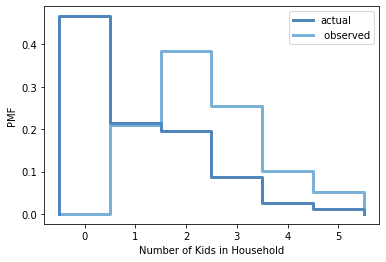

In [65]:
biased_pmf = BiasPmf(pmf,label = ' observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf,biased_pmf])
thinkplot.Config(xlabel = 'Number of Kids in Household',ylabel = 'PMF')

In [68]:
pmf.Mean()


1.024205155043831

In [67]:
biased_pmf.Mean()

2.403679100664282

# **Chapter 4 Exercise 2**

In [94]:
import numpy as np
import random

In [109]:
l = []
for x in range(1000):
    rn = random.random()
    l.append(rn)

rand_pmf = thinkstats2.Pmf(l,label = "Random Numbers")
rand_cdf = thinkstats2.Cdf(l)

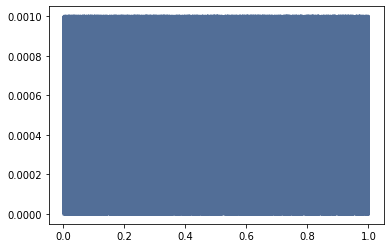

In [108]:
thinkplot.pmf(rand_pmf)

{'xscale': 'linear', 'yscale': 'linear'}

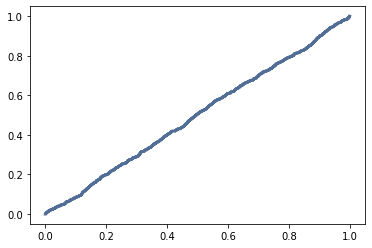

In [110]:
thinkplot.Cdf(rand_cdf)

**From the CDF, we see a straight diagonal line , showing that the distribution is indeed uniform**

# **Chapter 5 Exercise 1**

In [113]:
import brfss
import numpy
import scipy.stats


In [117]:
df = brfss.ReadBrfss()
df['ht_inch'] = df['htm3']/2.54
df.head()


,age,sex,wtyrago,finalwt,wtkg2,htm3,ht_inch
0,82.0,2,76.363636,185.870345,70.91,157.0,61.811024
1,65.0,2,72.727273,126.603027,72.73,163.0,64.173228
2,48.0,2,NaN,181.063210,NaN,165.0,64.960630
3,61.0,1,73.636364,517.926275,73.64,170.0,66.929134
4,26.0,1,88.636364,1252.624630,88.64,185.0,72.834646


In [120]:
mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc = mu, scale = sigma)
dist.cdf(73*2.54)- dist.cdf(70*2.54)

0.34274683763147457

**Appproximately 34 % of the population is between 5'10" and 6'1"**